In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# preliminaries

# data type for each feature
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
# number of unique values
for c in df.columns:
    print(c,"has",df[c].nunique(), "unique values.\n")

country has 101 unique values.

year has 32 unique values.

sex has 2 unique values.

age has 6 unique values.

suicides_no has 2084 unique values.

population has 25564 unique values.

suicides/100k pop has 5298 unique values.

country-year has 2321 unique values.

HDI for year has 305 unique values.

 gdp_for_year ($)  has 2321 unique values.

gdp_per_capita ($) has 2233 unique values.

generation has 6 unique values.



In [6]:
# number of missing entries
for c in df.columns:
    print(c, "has", df[c].isna().sum(),"missing values.\n")

country has 0 missing values.

year has 0 missing values.

sex has 0 missing values.

age has 0 missing values.

suicides_no has 0 missing values.

population has 0 missing values.

suicides/100k pop has 0 missing values.

country-year has 0 missing values.

HDI for year has 19456 missing values.

 gdp_for_year ($)  has 0 missing values.

gdp_per_capita ($) has 0 missing values.

generation has 0 missing values.



In [7]:
no_missing_col = [c for c in df.columns if (df[c].isna().sum()==0)]
print("This dataset has",len(no_missing_col),"features with no missing entries.")

This dataset has 11 features with no missing entries.


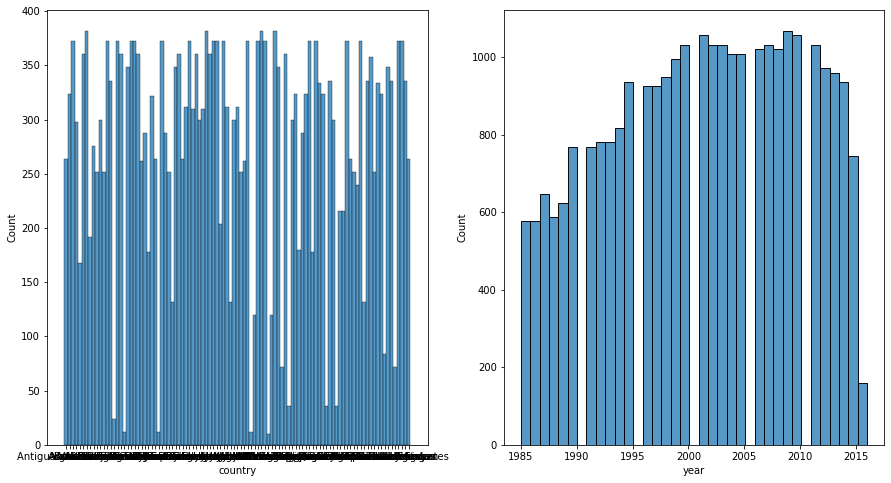

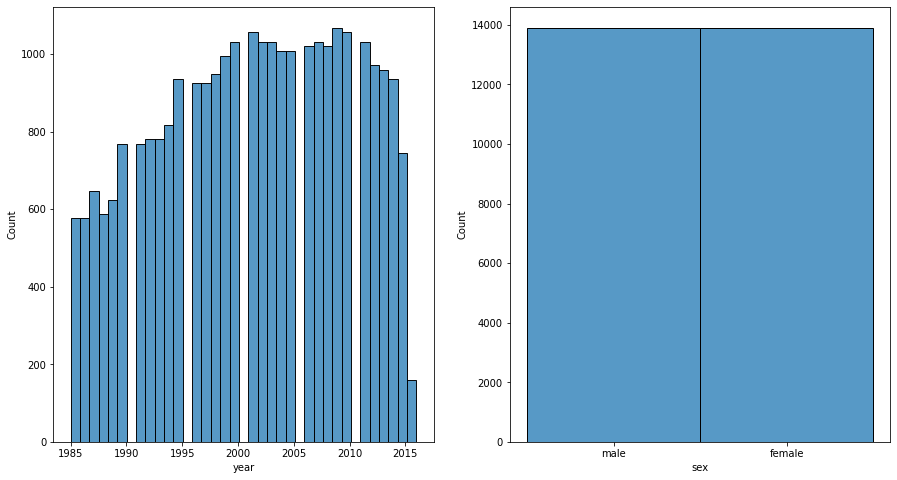

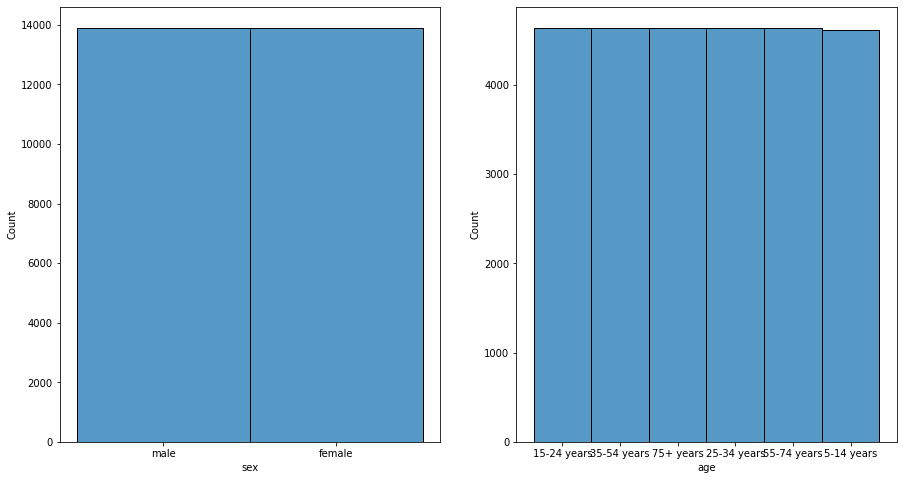

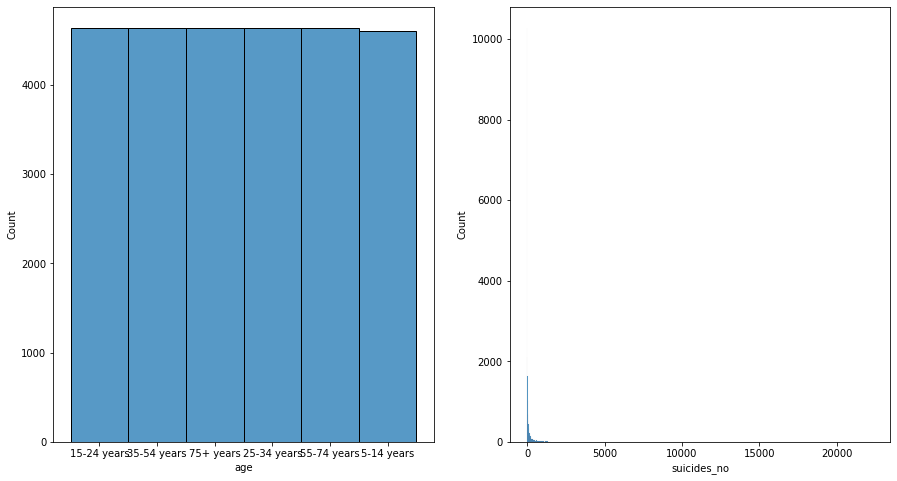

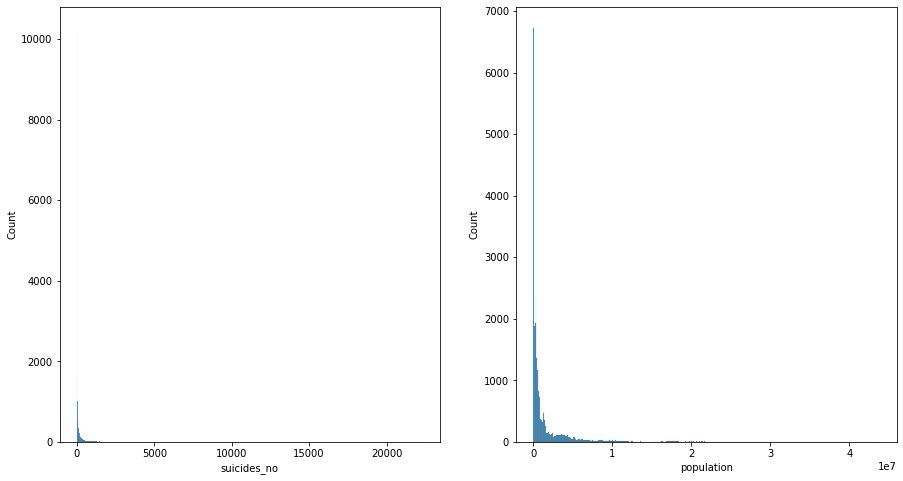

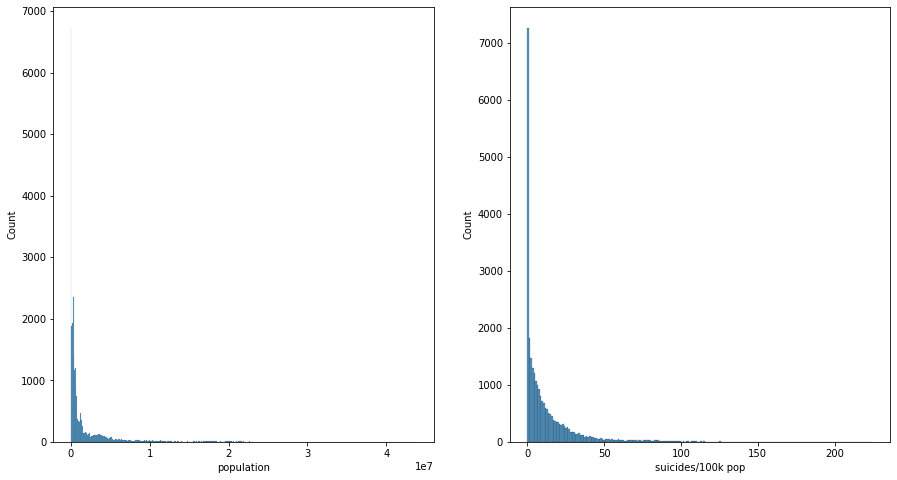

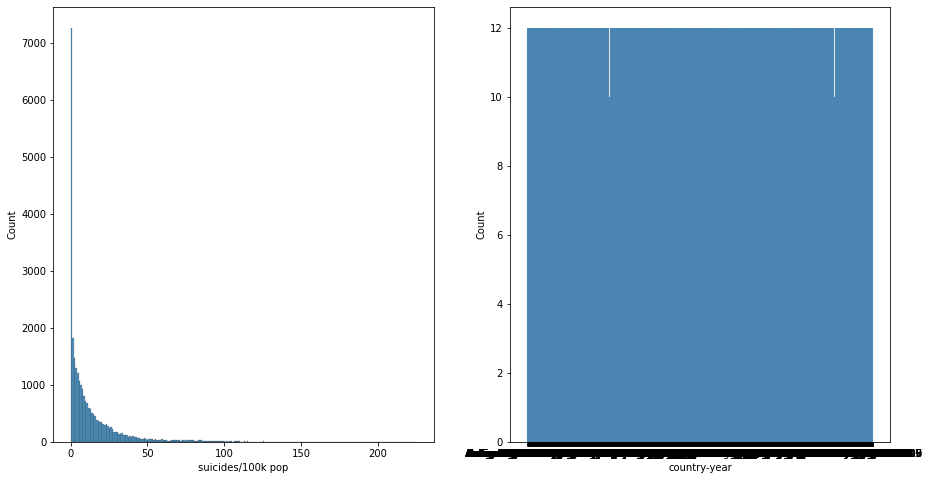

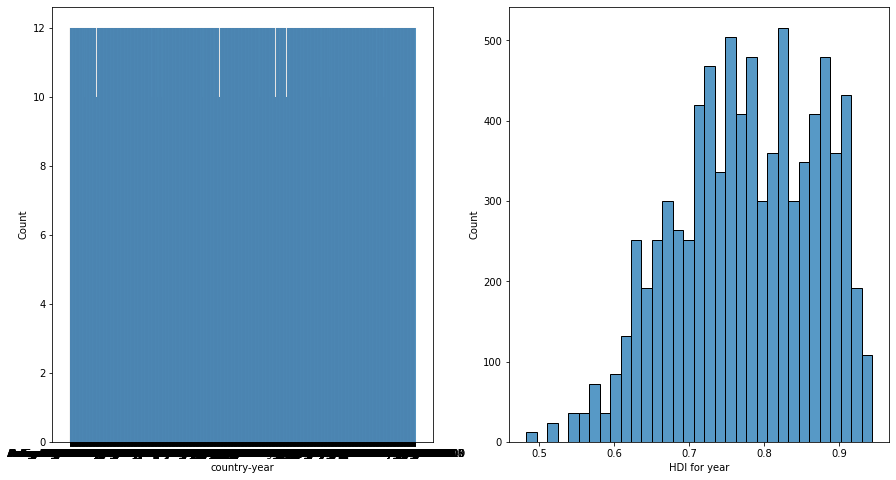

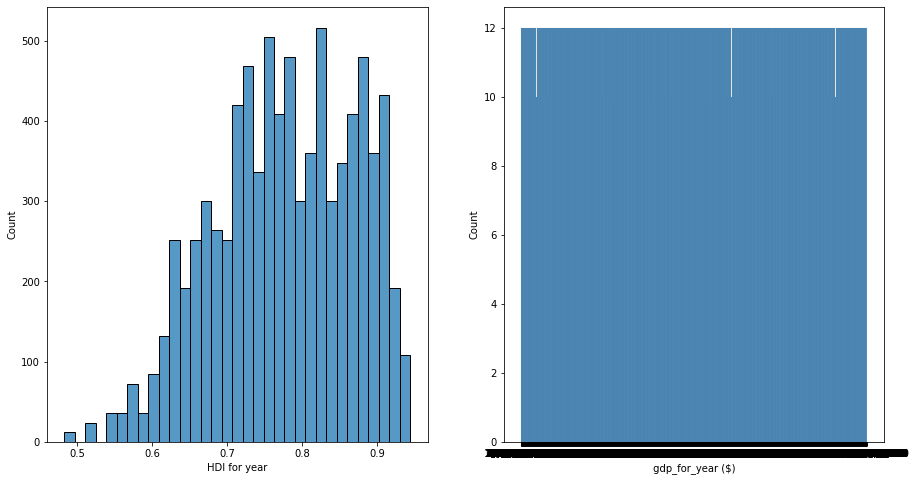

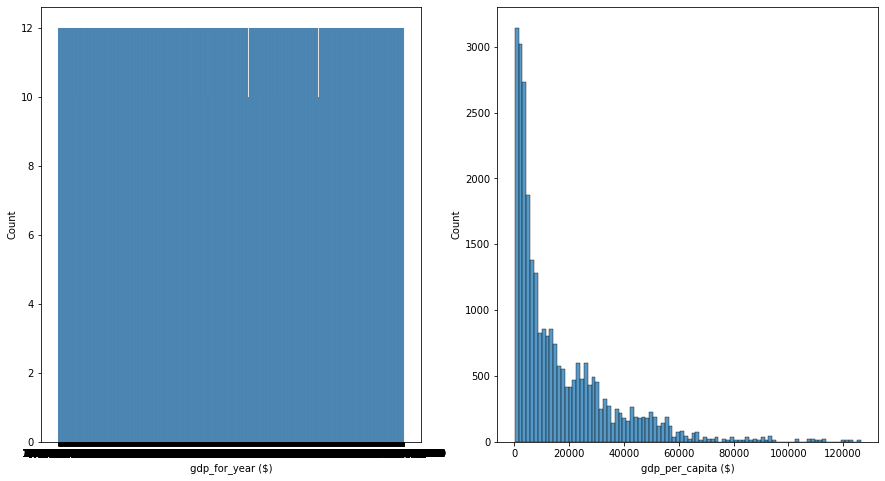

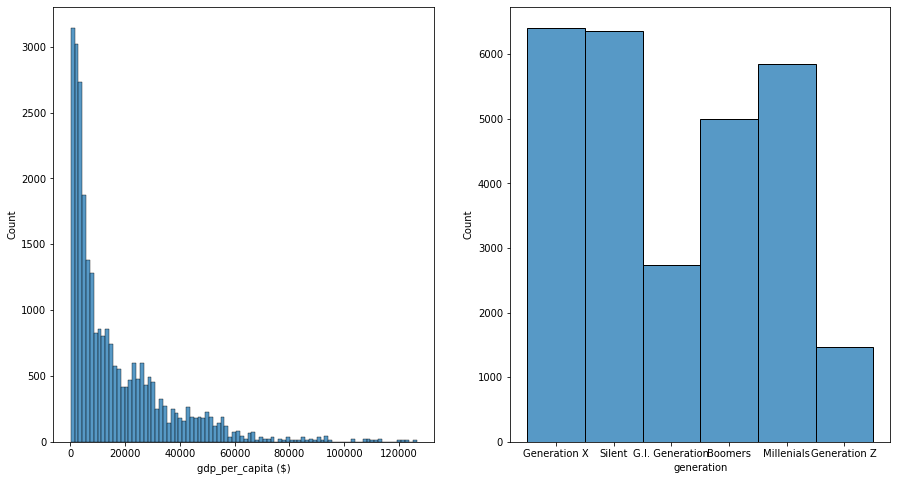

In [8]:
# histogram for all features
# 2 features in a row
for idx in range(0, df.columns.shape[0]-1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8) )
    sns.histplot(data=df, x=df.columns[idx], ax=ax[0])
    sns.histplot(data=df, x=df.columns[idx+1], ax=ax[1])

In [9]:
numerical = df.select_dtypes(include="object")
categorical = df.select_dtypes(include=np.number)

In [10]:
numerical.describe()

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


In [11]:
categorical.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [12]:
# mode value for each variable

df.mode(axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


,0,1,2,3,4,5,6,7,8,9,10,11
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,Albania1987,"2,156,624,900",796,Generation X,NaN
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,Albania1987,"2,156,624,900",796,Silent,NaN
2,Albania,1987.0,female,15-24 years,14.0,289700.0,4.83,Albania1987,"2,156,624,900",796,Generation X,NaN
3,Albania,1987.0,male,75+ years,1.0,21800.0,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,NaN
4,Albania,1987.0,male,25-34 years,9.0,274300.0,3.28,Albania1987,"2,156,624,900",796,Boomers,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014.0,female,35-54 years,107.0,3620833.0,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014.0,female,75+ years,9.0,348465.0,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014.0,male,5-14 years,60.0,2762158.0,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014.0,female,5-14 years,44.0,2631600.0,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


<AxesSubplot:>

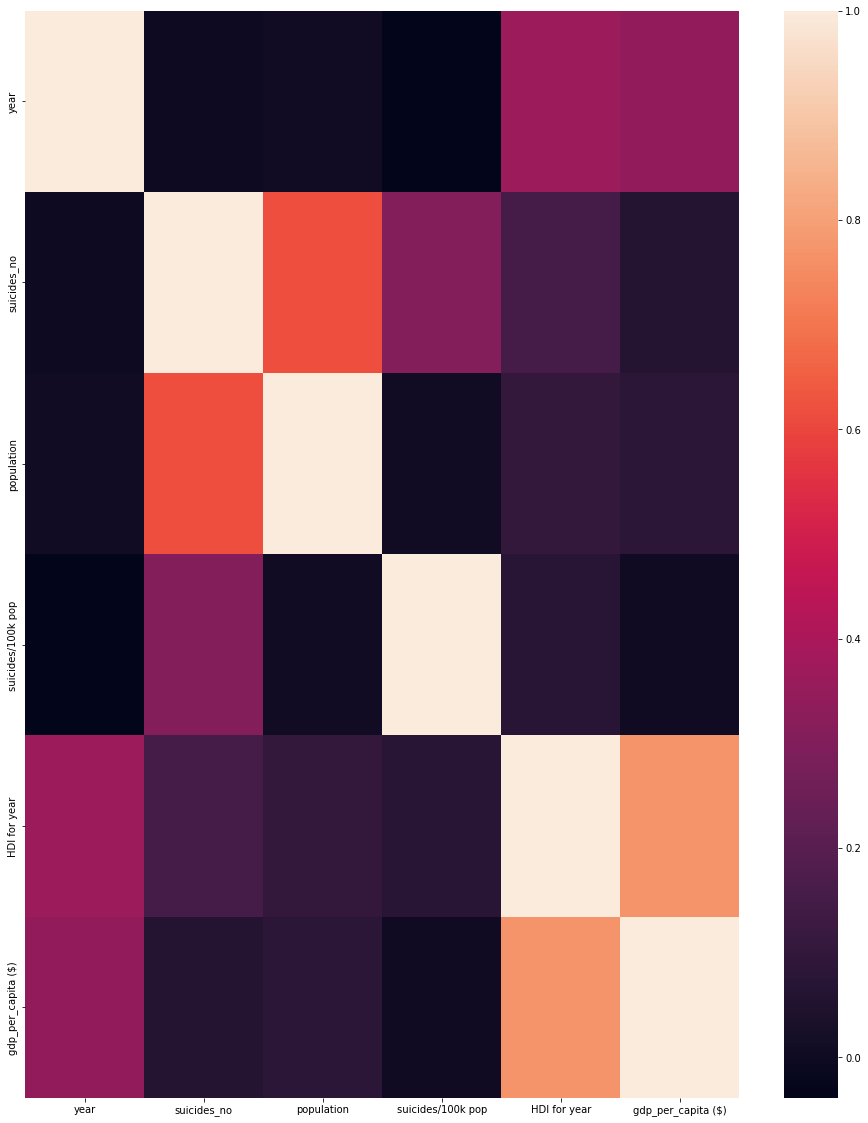

In [13]:
# correlation heatmap
plt.figure(figsize=(16,20))
sns.heatmap(df.corr())